## Predict which customers are at high risk of churn

### Problem Statment: Telecom industry is highly competitive in India and South East Asia and customers can easily switch from one service provider to another service provider. In this scenario, retaining customers, particularly retaining high profitable customers is main goan of all telecom operators.

### One of the leading telecom company wants to build a predictive models which will help them to identify the customers who are at high risk of churn.

### Reading and understanding the data

In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split


In [217]:
tele_data=pd.read_csv('telecom_churn_data.csv')

In [218]:
tele_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [219]:
tele_data.shape

(99999, 226)

In [220]:
tele_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [221]:
tele_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


#### Create a copy of original data frame

In [222]:
churn_data = tele_data.copy()

In [223]:
allColumns = tele_data.columns.tolist()

#### Breaking down the customer journey in the data set into three phases Good phase, Action phase & Churn phase.
#### Good phase: Customers are happy with the services. There is no change of customer behaviour.
#### Action phase: Customers are not that satisfied and looking for change of services.
#### Churn phase : At this phase, customers have already churned.

#### Here we have total four months (June, July, August & September) data and we will consider June and July as Good phase, August as Action phase and September as Churn phase.

#### Definition of High value customers:  Customers who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months i.e in June and July.

In [224]:
recharge_col = [col for col in allColumns if 'rech' in col]
recharge_col

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

In [225]:
# While we possess the total recharge amount for talk time, we lack the equivalent figure for data. Instead, we have the average and the number of recharges. 
#Let's proceed to calculate the data amount.
churn_data['total_data_rech_amt_6'] = churn_data['av_rech_amt_data_6'] * churn_data['total_rech_data_6']
churn_data['total_data_rech_amt_7'] = churn_data['av_rech_amt_data_7'] * churn_data['total_rech_data_7']
churn_data['total_data_rech_amt_8'] = churn_data['av_rech_amt_data_8'] * churn_data['total_rech_data_8']
churn_data['total_data_rech_amt_9'] = churn_data['av_rech_amt_data_9'] * churn_data['total_rech_data_9']

In [226]:
# Remove the columns that have already been considered.
churn_data.drop(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'av_rech_amt_data_6',
              'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'], axis=1, inplace=True)

In [227]:
# Find Average recharge amount for good phase i.e June and July month
phase_one_average_rech_amt = ( churn_data['total_rech_amt_6'].fillna(0) + churn_data['total_rech_amt_7'].fillna(0) + 
                               churn_data['total_data_rech_amt_6'].fillna(0) + churn_data['total_data_rech_amt_7'].fillna(0) ) / 2

In [228]:
# 70 percentile of the good_phase_average_rech_amt data
phase_one_avg_rech_amt_70 = np.percentile(phase_one_average_rech_amt, 70.0)
print(f'70 Percentile of recharge amount : {phase_one_avg_rech_amt_70}')

70 Percentile of recharge amount : 478.0


In [229]:
# Keep high value customer data
churn_data = churn_data[phase_one_average_rech_amt >= phase_one_avg_rech_amt_70]

print(f'Shape of high value customer data: {churn_data.shape}')

Shape of high value customer data: (30001, 222)


#### Assigning the churn label (1 for churn, 0 otherwise) is determined in the fourth month using the following criteria: Customers are labeled as churned if they have not engaged in any calls (incoming or outgoing) and have not utilized mobile internet at all during the churn phase. 
#### The following attributes utilized for tagging churners :

#### a)  total_ic_mou_9
#### b) total_og_mou_9
#### c) vol_2g_mb_9
#### d) vol_3g_mb_9

In [230]:
# Seperating columns for the 9th month
month9_columns = [col for col in allColumns if '9' in col]

# Seperating the ic columns 
month9_ic_columns = [col for col in month9_columns if 'ic' in col and 'mou' in col]

# Seperating oc columns
month9_oc_columns = [col for col in month9_columns if 'oc' in col and 'mou' in col]

# Seperating vol columns
month9_vol_columns = [col for col in month9_columns if 'vol' in col and 'mb' in col]

In [231]:
# Sum of all the ic columns
churn_data['ic_sum'] = tele_data[month9_ic_columns].sum(axis = 1)

# Sum of all the oc columns
churn_data['oc_sum'] = tele_data[month9_oc_columns].sum(axis = 1)

# Sum of all the vol columns
churn_data['vol_sum'] = tele_data[month9_vol_columns].sum(axis = 1)

In [232]:
churn_tag_columns = ['vol_sum', 'oc_sum', 'ic_sum']

# Generate the churn variable by summing up the newly aggregated columns, ensuring a value of 0 when all the columns contain zero values.
churn_data['churn'] = churn_data[churn_tag_columns].sum(axis = 1)

churn_data.head(15)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9,ic_sum,oc_sum,vol_sum,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,101.20,3.58,252.0,252.0,252.0,NaN,0.00,0.00,0.00,0.00
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,18.74,0.00,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,122.16,0.00,NaN,354.0,207.0,NaN,104.72,164.17,0.00,268.89
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,...,0.00,0.00,NaN,NaN,NaN,NaN,757.80,554.79,0.00,1312.59
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,74.350,...,0.00,0.00,NaN,712.0,540.0,252.0,382.42,450.31,328.67,1161.40
33,7000149764,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,977.020,...,1714.67,0.00,5285.0,20424.0,455.0,1814.0,280.39,36.47,5619.03,5935.89
38,7000815202,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,363.987,...,0.00,0.00,NaN,NaN,NaN,207.0,342.25,233.32,0.00,575.57
41,7000721289,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,482.832,...,0.00,0.00,NaN,NaN,NaN,NaN,355.29,217.00,0.00,572.29
48,7000294396,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1873.271,...,0.00,0.00,NaN,NaN,NaN,NaN,2684.39,3940.49,0.00,6624.88
53,7002188521,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,978.077,...,0.00,0.00,344.0,575.0,23.0,92.0,2041.52,1726.87,0.82,3769.21


In [233]:
# A churn value exceeding 0 implies that the user utilized a service, signifying an active user.
churn_data['churn'] = churn_data['churn'].apply(lambda x: 0 if x > 0 else 1)
churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9,ic_sum,oc_sum,vol_sum,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,101.20,3.58,252.0,252.0,252.0,NaN,0.00,0.00,0.00,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,18.74,0.00,NaN,NaN,NaN,NaN,0.00,0.00,0.00,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,122.16,0.00,NaN,354.0,207.0,NaN,104.72,164.17,0.00,0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,...,0.00,0.00,NaN,NaN,NaN,NaN,757.80,554.79,0.00,0
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,74.350,...,0.00,0.00,NaN,712.0,540.0,252.0,382.42,450.31,328.67,0


In [234]:
churn_data.churn.value_counts(normalize=True)

churn
0    0.942369
1    0.057631
Name: proportion, dtype: float64

In [235]:
# Excluding Columns from Month 9
churn_data.drop( [ col for col in month9_columns + churn_tag_columns if col not in ['total_rech_data_9', 'av_rech_amt_data_9'] ],
                axis=1, inplace=True)
churn_data.shape

(30001, 171)

## Data Cleaning

#### Finding out missing values in all columns

In [236]:
# Identifying missing values
missing_churn = round(churn_data.isna().sum() / len(churn_data) * 100, 2).sort_values(ascending=False)
missing_churn


total_data_rech_amt_9    49.27
arpu_3g_8                46.83
total_data_rech_amt_8    46.83
fb_user_8                46.83
max_rech_data_8          46.83
                         ...  
vol_2g_mb_6               0.00
vol_2g_mb_7               0.00
vol_2g_mb_8               0.00
vol_3g_mb_6               0.00
churn                     0.00
Length: 171, dtype: float64

#### Identifying columns with more than 40% missing values

In [237]:
drop_missing_churn = missing_churn[missing_churn > 40].index.tolist()
drop_missing_churn

['total_data_rech_amt_9',
 'arpu_3g_8',
 'total_data_rech_amt_8',
 'fb_user_8',
 'max_rech_data_8',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'night_pck_user_8',
 'date_of_last_rech_data_8',
 'arpu_2g_8',
 'arpu_3g_6',
 'max_rech_data_6',
 'total_data_rech_amt_6',
 'night_pck_user_6',
 'fb_user_6',
 'count_rech_3g_6',
 'date_of_last_rech_data_6',
 'count_rech_2g_6',
 'arpu_2g_6',
 'date_of_last_rech_data_7',
 'total_data_rech_amt_7',
 'max_rech_data_7',
 'arpu_3g_7',
 'count_rech_2g_7',
 'arpu_2g_7',
 'count_rech_3g_7',
 'night_pck_user_7',
 'fb_user_7']

#### Dropping columns with more than 40% missing values

In [238]:
churn_data.drop(drop_missing_churn, axis=1, inplace=True)
churn_data.shape

(30001, 143)

In [239]:
# Missing value status
round(churn_data.isna().sum() / len(churn_data) * 100, 2).sort_values(ascending=False)

loc_ic_mou_8          3.91
og_others_8           3.91
loc_og_t2f_mou_8      3.91
loc_ic_t2t_mou_8      3.91
spl_og_mou_8          3.91
                      ... 
max_rech_amt_6        0.00
max_rech_amt_7        0.00
max_rech_amt_8        0.00
last_day_rch_amt_6    0.00
churn                 0.00
Length: 143, dtype: float64

##### Remaining missing values are less than 5% and insignificant. Hence we will drop those rows 

In [240]:
for column in churn_data.columns:
    churn_data = churn_data[~churn_data[column].isna()]

In [241]:
# Missing value status
round(churn_data.isna().sum() / len(churn_data) * 100, 2).sort_values(ascending=False)

mobile_number       0.0
isd_ic_mou_6        0.0
total_ic_mou_6      0.0
total_ic_mou_7      0.0
total_ic_mou_8      0.0
                   ... 
std_og_t2c_mou_7    0.0
std_og_t2c_mou_8    0.0
std_og_mou_6        0.0
std_og_mou_7        0.0
churn               0.0
Length: 143, dtype: float64

In [242]:
# The date columns contribute no value except for marking the last day of the period, so we will remove them.
date_columns = [col for col in churn_data.columns if 'date' in col]
churn_data.drop(date_columns, axis=1, inplace=True)
[col for col in churn_data.columns if 'date' in col]

[]

In [243]:
churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,...,0,0,0,0,315,21.03,910.65,122.16,0.0,0
21,7002124215,109,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,...,0,0,0,0,720,0.00,0.00,0.00,0.0,0
23,7000887461,109,0.0,0.0,0.0,74.350,193.897,366.966,48.96,50.66,...,1,0,0,1,604,40.45,51.86,0.00,0.0,0
33,7000149764,109,0.0,0.0,0.0,977.020,2362.833,409.230,0.00,0.00,...,1,1,3,0,1328,358.10,2706.83,1714.67,0.0,0


In [244]:
churn_data.shape

(28163, 137)

#### Identifying columns with only one value

In [245]:
drop_single_val_columns = []
for col in churn_data.columns:
    if churn_data[f'{col}'].nunique() == 1:
        drop_single_val_columns.append(col)
drop_single_val_columns

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

#### Dropping single value columns as these clumns are not useful for current analysis

In [246]:

churn_data.drop(drop_single_val_columns, axis=1, inplace=True)


In [247]:
churn_data.shape

(28163, 127)

#### Dropping 'mobile_number' column as it is not useful for current analysis 

In [248]:
churn_data.drop('mobile_number', axis=1, inplace=True)
churn_data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,0,0,0,0,315,21.03,910.65,122.16,0.0,0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,...,0,0,0,0,720,0.00,0.00,0.00,0.0,0
23,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,...,1,0,0,1,604,40.45,51.86,0.00,0.0,0
33,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1,1,3,0,1328,358.10,2706.83,1714.67,0.0,0


#### Identifying high correlation features which to be removed from existing data frame

In [249]:
pd.reset_option('display.max_columns')
correlation_matrix = churn_data.corr()
correlation_matrix.loc[:, :] = np.tril(correlation_matrix, -1)
correlation_matrix = correlation_matrix.stack()
high_correlation = correlation_matrix[(correlation_matrix > 0.60) | (correlation_matrix < -0.60)]
high_correlation

arpu_7       arpu_6         0.728704
arpu_8       arpu_6         0.671437
             arpu_7         0.778413
onnet_mou_7  onnet_mou_6    0.770224
onnet_mou_8  onnet_mou_6    0.646114
                              ...   
aug_vbc_3g   vol_3g_mb_8    0.620313
jul_vbc_3g   vol_3g_mb_7    0.651025
             aug_vbc_3g     0.706559
jun_vbc_3g   vol_3g_mb_6    0.662497
             jul_vbc_3g     0.680020
Length: 207, dtype: float64

In [250]:
# List of columns exhibiting redundancy with others
redundant_columns = ['loc_og_t2m_mou_6', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 
                 'std_og_t2m_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 
                 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 
                 'std_ic_t2m_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 
                 'total_rech_amt_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8']

# Exclude the columns with high correlation
churn_data.drop(redundant_columns, axis=1, inplace=True)
churn_data.shape

(28163, 87)

#### Deriving new features from existing features
#### Generate total MOU by combining offnet and onnet

In [251]:
churn_data['total_mou_6'] = churn_data['onnet_mou_6'] + churn_data['offnet_mou_6']
churn_data['total_mou_7'] = churn_data['onnet_mou_7'] + churn_data['offnet_mou_7']
churn_data['total_mou_8'] = churn_data['onnet_mou_8'] + churn_data['offnet_mou_8']

# Remove the redundant columns
churn_data.drop(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'], axis=1, inplace=True)

churn_data.head()

,arpu_6,arpu_7,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_mou_6,total_mou_7,total_mou_8
7,1069.180,1349.850,3171.480,16.23,33.49,31.64,23.74,12.59,38.06,0.0,...,0,802,57.74,19.38,18.74,0.0,1,511.27,621.84,378.20
8,378.721,492.223,137.362,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0,315,21.03,910.65,122.16,0.0,0,508.35,431.66,171.56
21,514.453,597.753,637.760,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0,720,0.00,0.00,0.00,0.0,0,860.34,1028.79,1068.53
23,74.350,193.897,366.966,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,1,604,40.45,51.86,0.00,0.0,0,134.37,140.02,239.47
33,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0,1328,358.10,2706.83,1714.67,0.0,0,0.00,0.00,0.00


##### Generate new features, each representing Good phase by averaging values of 6th and 7th month

In [252]:
#Separate columns for the 6th and 7th months
columns_for_6_7 = [col[:-2] for col in churn_data.columns if '6' in col or '7' in col]


In [253]:
#Create new features and eliminate redundant columns
for column in set(columns_for_6_7):
    churn_data[f'gd_ph_{column}'] = (churn_data[f'{column}_6'] + churn_data[f'{column}_7']) / 2
    churn_data.drop([f'{column}_6', f'{column}_7'], axis=1, inplace=True)

churn_data.head()

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,...,gd_ph_sachet_3g,gd_ph_std_ic_t2f_mou,gd_ph_sachet_2g,gd_ph_arpu,gd_ph_total_rech_num,gd_ph_std_og_mou,gd_ph_loc_og_mou,gd_ph_last_day_rch_amt,gd_ph_monthly_2g,gd_ph_std_ic_t2t_mou
7,3171.480,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.0,...,0.0,43.215,0.0,1209.5150,5.0,68.000,478.035,0.0,0.0,24.360
8,137.362,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.0,...,0.0,0.000,0.5,435.4720,20.0,136.870,333.135,25.0,0.5,0.290
21,637.760,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.0,...,0.0,0.000,0.0,556.1030,24.0,848.990,95.565,25.0,0.0,10.020
23,366.966,0.00,0.00,17.71,182.14,0.00,39.61,0.00,17.71,0.0,...,0.0,0.000,0.0,134.1235,4.0,4.355,132.795,89.5,0.0,0.255
33,409.230,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.56,0.0,...,2.0,0.595,0.0,1669.9265,10.5,0.000,0.000,126.0,0.0,1.455


In [254]:
# Generate a new column
churn_data['gd_ph_vbc_3g'] = (churn_data['jul_vbc_3g'] + churn_data['jun_vbc_3g']) / 2

# Eliminate redundant columns
churn_data.drop(['jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'], axis=1, inplace=True)

# Rename the August column for VBC to vbc_3g_8
churn_data['vbc_3g_8'] = churn_data['aug_vbc_3g']
churn_data.drop('aug_vbc_3g', axis=1, inplace=True)

churn_data.head()

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,...,gd_ph_sachet_2g,gd_ph_arpu,gd_ph_total_rech_num,gd_ph_std_og_mou,gd_ph_loc_og_mou,gd_ph_last_day_rch_amt,gd_ph_monthly_2g,gd_ph_std_ic_t2t_mou,gd_ph_vbc_3g,vbc_3g_8
7,3171.480,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.0,...,0.0,1209.5150,5.0,68.000,478.035,0.0,0.0,24.360,19.060,57.74
8,137.362,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.0,...,0.5,435.4720,20.0,136.870,333.135,25.0,0.5,0.290,516.405,21.03
21,637.760,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.0,...,0.0,556.1030,24.0,848.990,95.565,25.0,0.0,10.020,0.000,0.00
23,366.966,0.00,0.00,17.71,182.14,0.00,39.61,0.00,17.71,0.0,...,0.0,134.1235,4.0,4.355,132.795,89.5,0.0,0.255,25.930,40.45
33,409.230,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.56,0.0,...,0.0,1669.9265,10.5,0.000,0.000,126.0,0.0,1.455,2210.750,358.10


In [255]:
churn_data.shape

(28163, 56)

In [256]:
# Reset the index 
churn_data.reset_index(inplace=True, drop=True)
churn_data.head()


,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,...,gd_ph_sachet_2g,gd_ph_arpu,gd_ph_total_rech_num,gd_ph_std_og_mou,gd_ph_loc_og_mou,gd_ph_last_day_rch_amt,gd_ph_monthly_2g,gd_ph_std_ic_t2t_mou,gd_ph_vbc_3g,vbc_3g_8
0,3171.480,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.0,...,0.0,1209.5150,5.0,68.000,478.035,0.0,0.0,24.360,19.060,57.74
1,137.362,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.0,...,0.5,435.4720,20.0,136.870,333.135,25.0,0.5,0.290,516.405,21.03
2,637.760,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.0,...,0.0,556.1030,24.0,848.990,95.565,25.0,0.0,10.020,0.000,0.00
3,366.966,0.00,0.00,17.71,182.14,0.00,39.61,0.00,17.71,0.0,...,0.0,134.1235,4.0,4.355,132.795,89.5,0.0,0.255,25.930,40.45
4,409.230,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.56,0.0,...,0.0,1669.9265,10.5,0.000,0.000,126.0,0.0,1.455,2210.750,358.10


## Exploratory Data Analysis

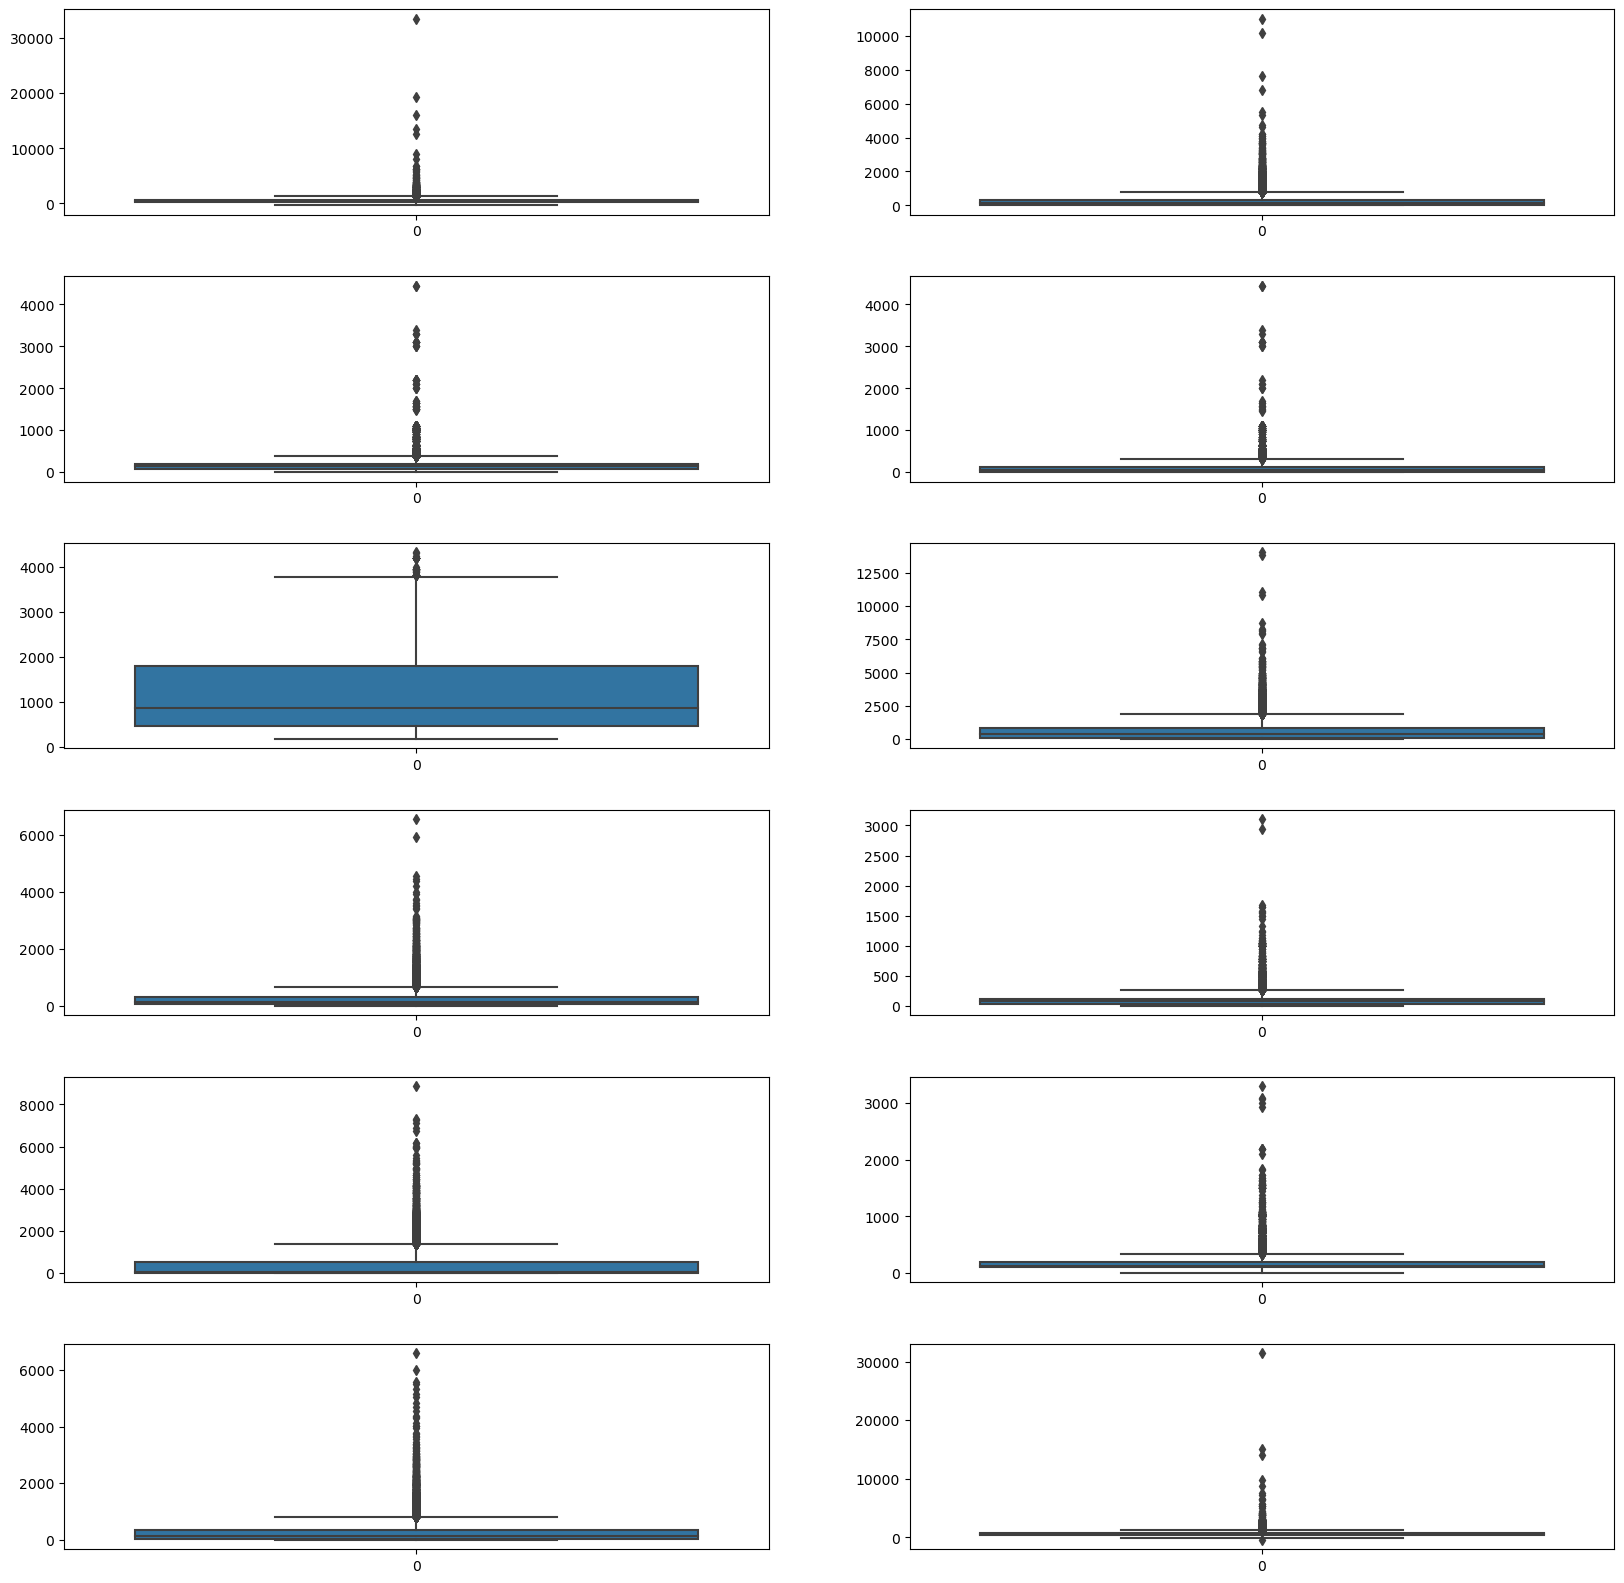

In [257]:
# List of features to be verified
columns_for_boxplot = ['arpu_8', 'loc_og_mou_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'aon', 'total_mou_8', 
                       'gd_ph_loc_ic_mou', 'gd_ph_last_day_rch_amt', 'gd_ph_std_og_mou', 'gd_ph_max_rech_amt', 
                       'gd_ph_loc_og_mou', 'gd_ph_arpu']

# Plot boxplots for each variable
fig, axes = plt.subplots(6, 2, figsize=(20, 20))
for index, column in enumerate(columns_for_boxplot):
    i, j = divmod(index, 2)
    sns.boxplot(churn_data[column], ax=axes[i, j])
    
plt.subplots_adjust(hspace=0.3) 
plt.show()

#### Insight : The following upper limit of the selected variables can be fixed on the basis of the above mentioned boxplot:
#### Feature : arpu_8; Value : 7,000
#### Feature : loc_og_mou_8; Value : 4,000
#### Feature : max_rech_amt_8; Value : 1,000
#### Feature : last_day_rch_amt_8; Value : 1,000
#### Feature : aon; Value : 3,000
#### Feature : total_mou_8; Value : 4,000
#### Feature : gd_ph_loc_ic_mou	; Value : 3,000
#### Feature : gd_ph_last_day_rch_amt ; Value : 1,000
#### Feature : gd_ph_std_og_mou ; Value : 4,000
#### Feature : gd_ph_max_rech_amt; Value : 1,500
#### Feature : gd_ph_loc_og_mou	; Value : 3,000
#### Feature :gd_ph_arpu; Value : 7,000


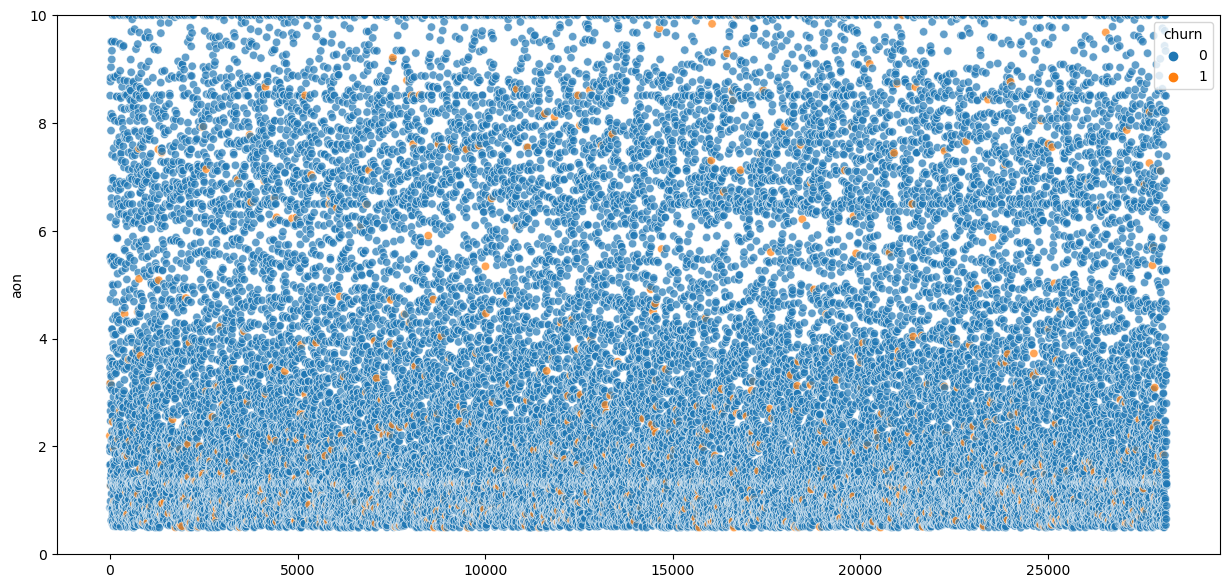

In [258]:
# Examine Churn Based on Tenure
plt.figure(figsize=(15,7))
sns.scatterplot(y=churn_data['aon'] / 365, x=churn_data.index, hue=churn_data.churn, alpha=0.7)
plt.ylim(0,10)
plt.show()

#### Insight : Though it is very difficult to get any specific pattern from the above scatterplot, but it evident that maximum churners have spent less than 4 years with the service provider

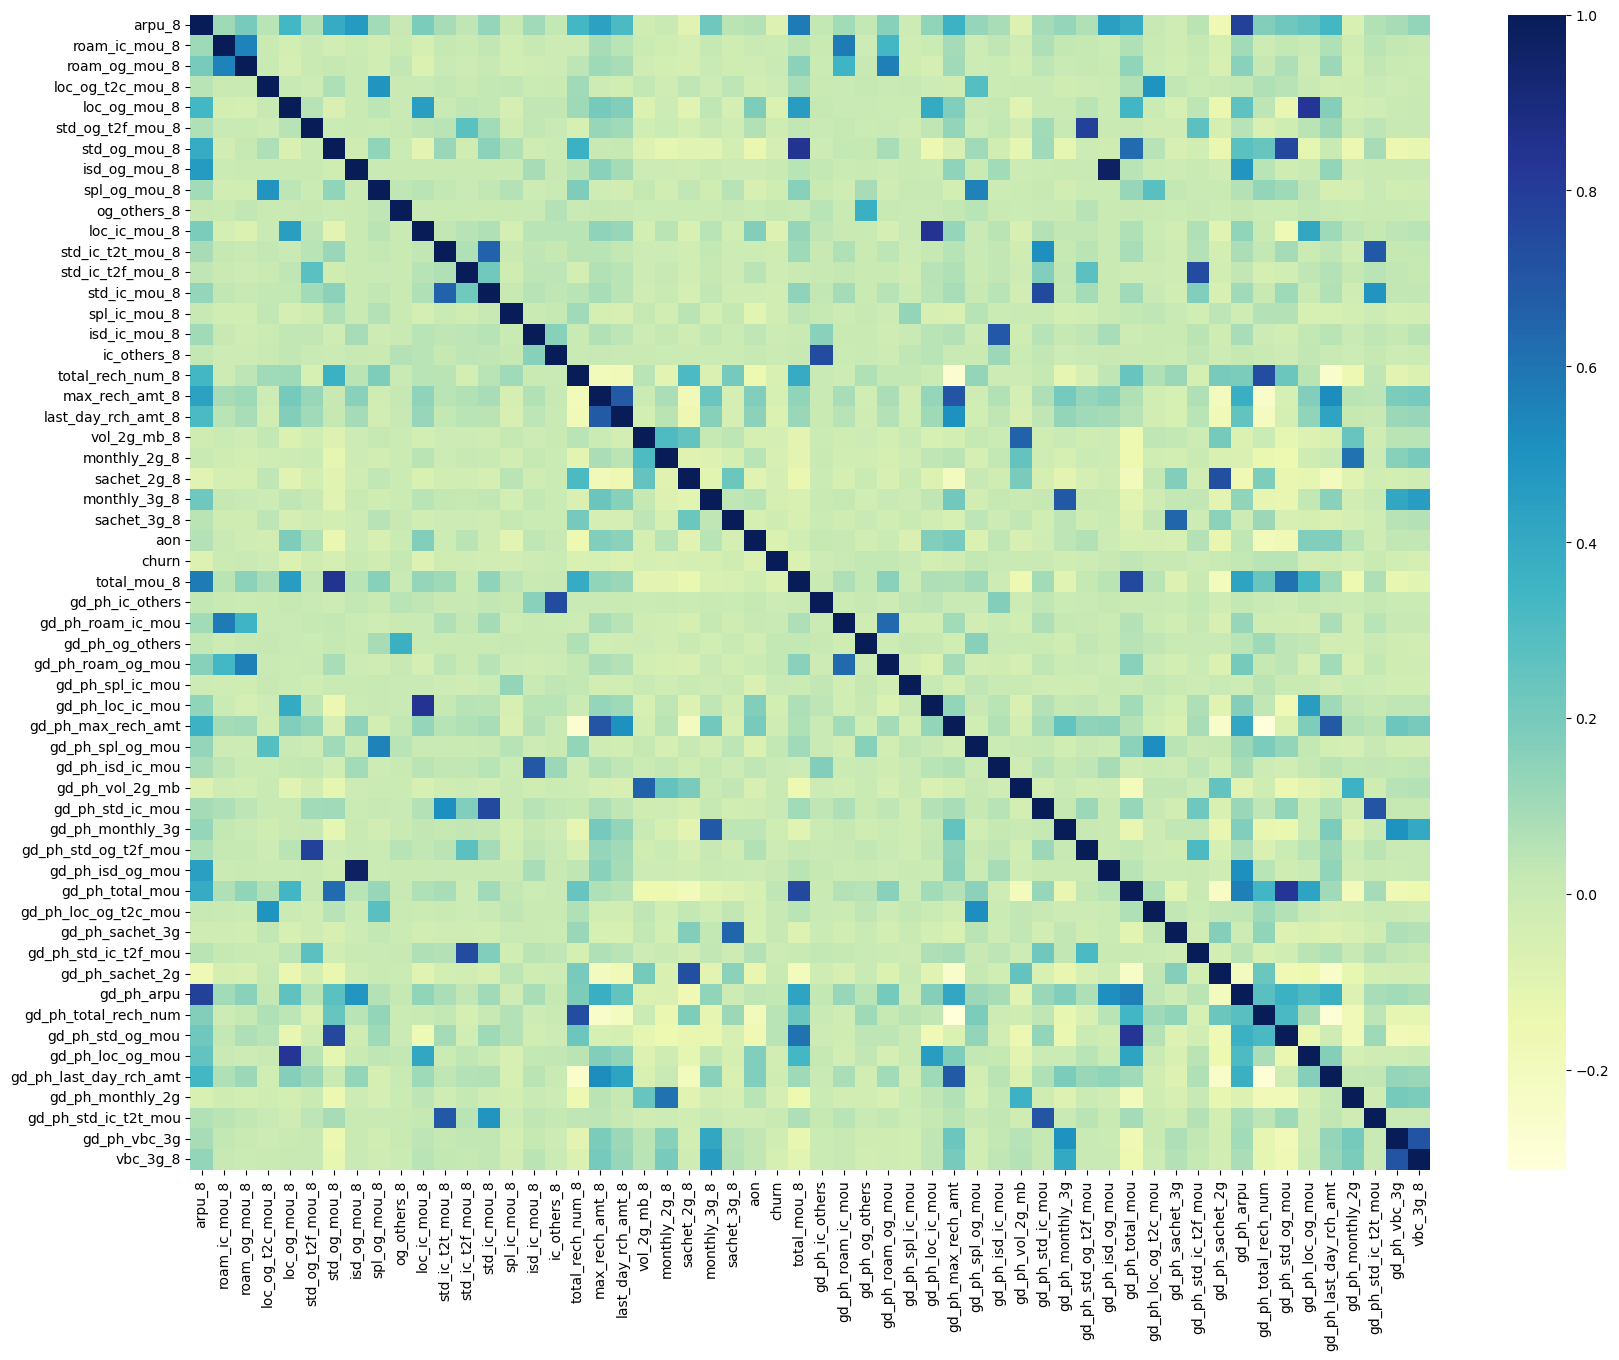

In [259]:
plt.figure(figsize = (20, 15))
sns.heatmap(churn_data.corr(), annot = False, cmap="YlGnBu")
plt.show()

#### From the above Heatmap we can identify highly correlated variables:
#### gd_phisd_og_mou & isd_og_mou_8
#### gd_ph_loc_og_mou & loc_og_mou_8
#### gd_ph_arpu & arpu_8
#### gd_ph_std_og_mou & gd_ph_total_mou

C:\Users\navneet.singh\AppData\Local\Temp\ipykernel_13848\860646062.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn_data['churn'])


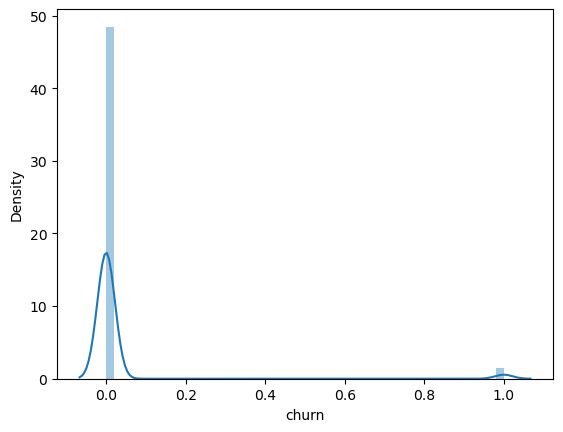

In [260]:
# Distribution of target variable
sns.distplot(churn_data['churn'])
plt.show()

#### Insight: While the variable is not skewed, it is highly imbalanced, with approximately 95% of the dataset representing non-churners. To address this imbalance, we will utilize the SMOTE method.

## Data Preparation

In [261]:
#Limit the features with high outliers
column_upper_limits = [('arpu_8', 7000), ('loc_og_mou_8', 4000), ('max_rech_amt_8', 1000 ), ('last_day_rch_amt_8', 1000 ), 
                       ('aon', 3000), ('total_mou_8', 4000), ('gd_ph_loc_ic_mou', 3000), ('gd_ph_last_day_rch_amt', 1000 ), 
                       ('gd_ph_std_og_mou', 4000), ('gd_ph_max_rech_amt', 1500), ('gd_ph_loc_og_mou', 3000), ('gd_ph_arpu', 7000)]

for column, value in column_upper_limits:
    churn_data[column] = churn_data[column].apply(lambda x: x if x < value else value)

churn_data[columns_for_boxplot].head()

,arpu_8,loc_og_mou_8,max_rech_amt_8,last_day_rch_amt_8,aon,total_mou_8,gd_ph_loc_ic_mou,gd_ph_last_day_rch_amt,gd_ph_std_og_mou,gd_ph_max_rech_amt,gd_ph_loc_og_mou,gd_ph_arpu
0,3171.480,255.79,1000,779,802,378.20,391.555,0.0,68.000,1185.0,478.035,1209.5150
1,137.362,63.04,30,10,315,171.56,52.630,25.0,136.870,122.0,333.135,435.4720
2,637.760,129.74,50,50,720,1068.53,106.505,25.0,848.990,50.0,95.565,556.1030
3,366.966,182.14,179,0,604,239.47,145.520,89.5,4.355,89.5,132.795,134.1235
4,409.230,0.00,455,455,1328,0.00,2.180,126.0,0.000,753.5,0.000,1669.9265


In [262]:
y = churn_data['churn']
X = churn_data.drop('churn', axis=1)

### Standardization

In [263]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

### Handling Class Imbalance

In [264]:
churn_data.churn.value_counts()

churn
0    27295
1      868
Name: count, dtype: int64

In [265]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [266]:
y_resampled.value_counts()

churn
1    27295
0    27295
Name: count, dtype: int64

C:\Users\navneet.singh\AppData\Local\Temp\ipykernel_13848\4265442478.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_resampled)


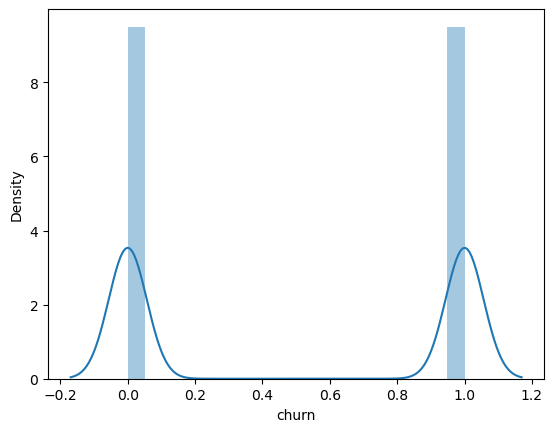

In [267]:
sns.distplot(y_resampled)
plt.show()

Insight: Now, with the balanced classes, the target variable is no longer skewed.

In [268]:
from sklearn.decomposition import PCA

pca = PCA(n_components=25)
X_pca_transformed = pca.fit_transform(X_resampled)
X_pca_transformed.shape

(54590, 25)

# MODEL BUILDING

## Logistic Regression

    For logistic regression, we will use the original X and y to enable RFE for feature selection rather than PCA, aiming to identify the robust predictors of churn.

In [269]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, train_size=0.7, test_size=0.3, random_state=25)

In [270]:
import statsmodels.api as sm
# Initial logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38213
Model:                            GLM   Df Residuals:                    38157
Model Family:                Binomial   Df Model:                           55
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17495.
Date:                Sat, 10 Aug 2024   Deviance:                       34989.
Time:                        11:28:21   Pearson chi2:                 1.39e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3754
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.4263      0.022    -64.034      0.000      -1.470      -1.383
arpu_8                     0.4480      0.049      9.143      0.000       0.352       0.544
roam_ic_mou_8             -0.4067      0.034    -12.125      0.000      -0.472      -0.341
roam_og_mou_8             -0.0466      0.033     -1.415      0.157      -0.111       0.018
loc_og_t2c_mou_8           0.0717      0.024      3.032      0.002       0.025       0.118
loc_og_mou_8              -0.3651      0.093     -3.938      0.000      -0.547      -0.183
std_og_t2f_mou_8          -0.1397      0.041     -3.389      0.001      -0.221      -0.059
std_og_mou_8              -0.0983      0.131     -0.750      0.453      -0.355       0.158
isd_og_mou_8              -0.2239      0.069     -3.243      0.001      -0.359      -0.089
spl_og_mou_8              -0.1959      0.035     -5.623      0.000      -0.264      -0.128
og_others_8                0.0873      0.024      3.681      0.000       0.041       0.134
loc_ic_mou_8              -1.6866      0.059    -28.677      0.000      -1.802      -1.571
std_ic_t2t_mou_8          -0.5831      0.065     -8.985      0.000      -0.710      -0.456
std_ic_t2f_mou_8          -0.0224      0.040     -0.566      0.572      -0.100       0.055
std_ic_mou_8              -0.1598      0.045     -3.583      0.000      -0.247      -0.072
spl_ic_mou_8              -0.2152      0.021    -10.012      0.000      -0.257      -0.173
isd_ic_mou_8              -0.1573      0.028     -5.596      0.000      -0.212      -0.102
ic_others_8                0.1748      0.032      5.529      0.000       0.113       0.237
total_rech_num_8          -0.4986      0.034    -14.620      0.000      -0.565      -0.432
max_rech_amt_8             0.1899      0.024      7.817      0.000       0.142       0.238
last_day_rch_amt_8        -0.5462      0.022    -25.311      0.000      -0.589      -0.504
vol_2g_mb_8               -0.2947      0.030     -9.743      0.000      -0.354      -0.235
monthly_2g_8              -0.5893      0.028    -20.864      0.000      -0.645      -0.534
sachet_2g_8               -0.6012      0.030    -19.878      0.000      -0.661      -0.542
monthly_3g_8              -0.9116      0.038    -24.171      0.000      -0.986      -0.838
sachet_3g_8               -0.3841      0.035    -10.977      0.000      -0.453      -0.316
aon                       -0.3977      0.017    -24.089      0.000      -0.430      -0.365
total_mou_8               -0.7591      0.146     -5.209      0.000      -1.045      -0.474
gd_ph_ic_others           -0.4325      0.064     -6.779      0.000      -0.558      -0.307
gd_ph_roam_ic_mou          0.0561      0.026      2.166      0.030       0.005       0.107
gd_ph_og_others           -0.1127      0.031     -3.664      0.000      -0.173  

Using RFE for Feature Selection

In [271]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Create a Logistic Regression object
logistic_regression = LogisticRegression(solver='liblinear')

# Perform RFE for 25 features
rfe = RFE(logistic_regression, n_features_to_select=25)
rfe = rfe.fit(X_train, y_train)

In [272]:
rfe_col = X.columns[rfe.support_]
rfe_col

Index(['arpu_8', 'roam_ic_mou_8', 'loc_og_mou_8', 'loc_ic_mou_8',
       'std_ic_t2t_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'aon', 'total_mou_8',
       'gd_ph_roam_og_mou', 'gd_ph_loc_ic_mou', 'gd_ph_vol_2g_mb',
       'gd_ph_monthly_3g', 'gd_ph_total_mou', 'gd_ph_sachet_3g',
       'gd_ph_total_rech_num', 'gd_ph_std_og_mou', 'gd_ph_loc_og_mou'],
      dtype='object')

In [273]:
# Construct a model with RFE-selected features
X_train_sm_const = sm.add_constant(X_train[rfe_col])
log_model = sm.GLM(y_train, X_train_sm_const, family=sm.families.Binomial())
result_summary = log_model.fit()
result_summary.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38213
Model:                            GLM   Df Residuals:                    38187
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17764.
Date:                Sat, 10 Aug 2024   Deviance:                       35528.
Time:                        11:29:25   Pearson chi2:                 1.92e+05
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3665
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.3573      0.021    -63.458      0.000      -1.399      -1.315
arpu_8                   0.3533      0.033     10.825      0.000       0.289       0.417
roam_ic_mou_8           -0.3624      0.026    -14.202      0.000      -0.412      -0.312
loc_og_mou_8            -0.2828      0.047     -6.008      0.000      -0.375      -0.191
loc_ic_mou_8            -1.7448      0.058    -30.105      0.000      -1.858      -1.631
std_ic_t2t_mou_8        -0.3962      0.042     -9.417      0.000      -0.479      -0.314
spl_ic_mou_8            -0.2286      0.021    -10.804      0.000      -0.270      -0.187
total_rech_num_8        -0.5703      0.032    -17.630      0.000      -0.634      -0.507
max_rech_amt_8           0.2382      0.022     10.779      0.000       0.195       0.282
last_day_rch_amt_8      -0.5497      0.021    -26.072      0.000      -0.591      -0.508
vol_2g_mb_8             -0.2671      0.030     -8.989      0.000      -0.325      -0.209
monthly_2g_8            -0.6972      0.025    -27.787      0.000      -0.746      -0.648
sachet_2g_8             -0.4703      0.023    -20.526      0.000      -0.515      -0.425
monthly_3g_8            -0.9591      0.036    -26.835      0.000      -1.029      -0.889
sachet_3g_8             -0.4200      0.035    -11.884      0.000      -0.489      -0.351
aon                     -0.3985      0.016    -24.794      0.000      -0.430      -0.367
total_mou_8             -0.8328      0.037    -22.587      0.000      -0.905      -0.761
gd_ph_roam_og_mou        0.3068      0.033      9.295      0.000       0.242       0.371
gd_ph_loc_ic_mou         0.8521      0.040     21.334      0.000       0.774       0.930
gd_ph_vol_2g_mb          0.2244      0.020     11.169      0.000       0.185       0.264
gd_ph_monthly_3g         0.2872      0.023     12.505      0.000       0.242       0.332
gd_ph_total_mou         -0.8290      0.203     -4.078      0.000      -1.227      -0.431
gd_ph_sachet_3g          0.2044      0.022      9.505      0.000       0.162       0.247
gd_ph_total_rech_num     0.3806      0.024     15.949      0.000       0.334       0.427
gd_ph_std_og_mou         1.0200      0.179      5.697      0.000       0.669       1.371
gd_ph_loc_og_mou         0.7534      0.113      6.663      0.000       0.532       0.975
========================================================================================
"""

In [274]:
# Make predictions on the training data
y_train_pred = result_summary.predict(X_train_sm_const).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn': y_train.values, 'Churn_Prob': y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,1,0.543166,1
1,1,0.789861,1
2,1,0.964418,1
3,0,0.118026,0
4,0,0.848026,1


In [275]:
from sklearn import metrics

# Confusion matrix
confusion_matrix_result = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
print(confusion_matrix_result)

print()

# Overall accuracy
print(f'Accuracy: {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')


[[14754  4326]
 [ 3450 15683]]

Accuracy: 0.7965090414256928


In [276]:
# Examine the VIF values of the feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe to store the names of all feature variables and their respective VIFs
vif_df = pd.DataFrame()
vif_df['Features'] = X_train[rfe_col].columns
vif_df['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values(by="VIF", ascending=False)
vif_df

,Features,VIF
20,gd_ph_total_mou,91.27
23,gd_ph_std_og_mou,82.36
24,gd_ph_loc_og_mou,24.76
15,total_mou_8,4.40
2,loc_og_mou_8,4.33
0,arpu_8,4.28
3,loc_ic_mou_8,3.76
17,gd_ph_loc_ic_mou,3.40
6,total_rech_num_8,3.30
16,gd_ph_roam_og_mou,3.01


Insight: Since the VIF for gd_ph_total_mou is very high we will drop it

In [277]:
rfe_col = rfe_col.drop('gd_ph_total_mou', 1)

Model 2:

In [278]:
# Construct a new model
X_train_sm_const = sm.add_constant(X_train[rfe_col])
log_model_3 = sm.GLM(y_train, X_train_sm_const, family=sm.families.Binomial())
result_summary_3 = log_model_3.fit()
result_summary_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38213
Model:                            GLM   Df Residuals:                    38188
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17773.
Date:                Sat, 10 Aug 2024   Deviance:                       35545.
Time:                        11:29:31   Pearson chi2:                 2.10e+05
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3663
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.3523      0.021    -63.404      0.000      -1.394      -1.311
arpu_8                   0.3185      0.032     10.022      0.000       0.256       0.381
roam_ic_mou_8           -0.3582      0.025    -14.066      0.000      -0.408      -0.308
loc_og_mou_8            -0.2759      0.047     -5.878      0.000      -0.368      -0.184
loc_ic_mou_8            -1.7389      0.058    -30.062      0.000      -1.852      -1.626
std_ic_t2t_mou_8        -0.3951      0.042     -9.406      0.000      -0.477      -0.313
spl_ic_mou_8            -0.2291      0.021    -10.822      0.000      -0.271      -0.188
total_rech_num_8        -0.5567      0.032    -17.294      0.000      -0.620      -0.494
max_rech_amt_8           0.2384      0.022     10.811      0.000       0.195       0.282
last_day_rch_amt_8      -0.5450      0.021    -25.911      0.000      -0.586      -0.504
vol_2g_mb_8             -0.2654      0.030     -8.945      0.000      -0.324      -0.207
monthly_2g_8            -0.6956      0.025    -27.725      0.000      -0.745      -0.646
sachet_2g_8             -0.4728      0.023    -20.642      0.000      -0.518      -0.428
monthly_3g_8            -0.9503      0.036    -26.666      0.000      -1.020      -0.880
sachet_3g_8             -0.4173      0.035    -11.832      0.000      -0.486      -0.348
aon                     -0.3968      0.016    -24.708      0.000      -0.428      -0.365
total_mou_8             -0.8211      0.037    -22.388      0.000      -0.893      -0.749
gd_ph_roam_og_mou        0.1902      0.016     11.806      0.000       0.159       0.222
gd_ph_loc_ic_mou         0.8502      0.040     21.295      0.000       0.772       0.928
gd_ph_vol_2g_mb          0.2221      0.020     11.069      0.000       0.183       0.261
gd_ph_monthly_3g         0.2857      0.023     12.456      0.000       0.241       0.331
gd_ph_sachet_3g          0.2032      0.021      9.476      0.000       0.161       0.245
gd_ph_total_rech_num     0.3728      0.024     15.671      0.000       0.326       0.419
gd_ph_std_og_mou         0.2980      0.022     13.364      0.000       0.254       0.342
gd_ph_loc_og_mou         0.3118      0.032      9.686      0.000       0.249       0.375
========================================================================================
"""

In [279]:
# Make predictions on the training data
y_train_pred = result_summary_3.predict(X_train_sm_const).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn': y_train.values, 'Churn_Prob': y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,1,0.542628,1
1,1,0.790579,1
2,1,0.964369,1
3,0,0.116685,0
4,0,0.847418,1


In [280]:
# Confusion matrix
confusion_matrix_result = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
print(confusion_matrix_result)

print()

# Overall accuracy
print(f'Accuracy: {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[14752  4328]
 [ 3458 15675]]

Accuracy: 0.7962473503781435


In [281]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,total_mou_8,4.39
2,loc_og_mou_8,4.33
0,arpu_8,4.17
3,loc_ic_mou_8,3.75
17,gd_ph_loc_ic_mou,3.40
23,gd_ph_loc_og_mou,3.33
6,total_rech_num_8,3.28
7,max_rech_amt_8,2.65
22,gd_ph_std_og_mou,2.45
21,gd_ph_total_rech_num,2.44


In [282]:
# Drop 'total_mou_8' because it has high VIF value
rfe_col = rfe_col.drop('total_mou_8', 1)

Model 3: 

In [283]:
# Construct a new model
X_train_sm_const = sm.add_constant(X_train[rfe_col])
log_model_4 = sm.GLM(y_train, X_train_sm_const, family=sm.families.Binomial())
result_summary_4 = log_model_4.fit()
result_summary_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38213
Model:                            GLM   Df Residuals:                    38189
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18055.
Date:                Sat, 10 Aug 2024   Deviance:                       36110.
Time:                        11:29:36   Pearson chi2:                 1.16e+06
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3568
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.3460      0.021    -62.748      0.000      -1.388      -1.304
arpu_8                  -0.0008      0.027     -0.030      0.976      -0.054       0.052
roam_ic_mou_8           -0.3312      0.025    -13.461      0.000      -0.379      -0.283
loc_og_mou_8            -0.5457      0.045    -12.173      0.000      -0.634      -0.458
loc_ic_mou_8            -1.8187      0.058    -31.140      0.000      -1.933      -1.704
std_ic_t2t_mou_8        -0.4522      0.043    -10.551      0.000      -0.536      -0.368
spl_ic_mou_8            -0.2314      0.021    -10.953      0.000      -0.273      -0.190
total_rech_num_8        -0.8164      0.031    -26.320      0.000      -0.877      -0.756
max_rech_amt_8           0.2983      0.022     13.771      0.000       0.256       0.341
last_day_rch_amt_8      -0.5565      0.021    -26.624      0.000      -0.597      -0.515
vol_2g_mb_8             -0.2538      0.030     -8.560      0.000      -0.312      -0.196
monthly_2g_8            -0.6726      0.025    -26.643      0.000      -0.722      -0.623
sachet_2g_8             -0.4341      0.023    -18.805      0.000      -0.479      -0.389
monthly_3g_8            -0.8810      0.036    -24.782      0.000      -0.951      -0.811
sachet_3g_8             -0.3581      0.035    -10.120      0.000      -0.427      -0.289
aon                     -0.3849      0.016    -24.061      0.000      -0.416      -0.354
gd_ph_roam_og_mou        0.1548      0.015     10.051      0.000       0.125       0.185
gd_ph_loc_ic_mou         0.9286      0.040     22.957      0.000       0.849       1.008
gd_ph_vol_2g_mb          0.2070      0.020     10.330      0.000       0.168       0.246
gd_ph_monthly_3g         0.2910      0.023     12.687      0.000       0.246       0.336
gd_ph_sachet_3g          0.1705      0.021      7.973      0.000       0.129       0.212
gd_ph_total_rech_num     0.5556      0.023     24.357      0.000       0.511       0.600
gd_ph_std_og_mou        -0.0339      0.015     -2.232      0.026      -0.064      -0.004
gd_ph_loc_og_mou         0.2826      0.032      8.747      0.000       0.219       0.346
========================================================================================
"""

In [284]:
# Make predictions on the training data
y_train_pred = result_summary_4.predict(X_train_sm_const).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn': y_train.values, 'Churn_Prob': y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,1,0.466016,0
1,1,0.797215,1
2,1,0.899932,1
3,0,0.141638,0
4,0,0.832749,1


In [285]:
# Confusion matrix
confusion_matrix_result = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
print(confusion_matrix_result)

[[14495  4585]
 [ 3381 15752]]


In [286]:
# Overall accuracy
print(f'Accuracy: {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

Accuracy: 0.7915369115222568


In [287]:
# Create a dataframe to store the names of all feature variables and their respective VIFs
vif_df = pd.DataFrame()
vif_df['Features'] = X_train[rfe_col].columns
vif_df['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values(by="VIF", ascending=False)
vif_df

,Features,VIF
2,loc_og_mou_8,3.85
3,loc_ic_mou_8,3.75
16,gd_ph_loc_ic_mou,3.40
0,arpu_8,3.35
22,gd_ph_loc_og_mou,3.32
6,total_rech_num_8,2.87
7,max_rech_amt_8,2.62
20,gd_ph_total_rech_num,2.22
8,last_day_rch_amt_8,1.98
12,monthly_3g_8,1.89


In [288]:
# Drop 'loc_og_mou_8'
rfe_col = rfe_col.drop('loc_og_mou_8', 1)

model 4:

In [289]:
# Construct a new model
X_train_sm_const = sm.add_constant(X_train[rfe_col])
log_model_5 = sm.GLM(y_train, X_train_sm_const, family=sm.families.Binomial())
result_summary_5 = log_model_5.fit()
result_summary_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38213
Model:                            GLM   Df Residuals:                    38190
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18142.
Date:                Sat, 10 Aug 2024   Deviance:                       36284.
Time:                        11:29:41   Pearson chi2:                 2.01e+06
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3539
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.3328      0.021    -62.423      0.000      -1.375      -1.291
arpu_8                  -0.0658      0.027     -2.467      0.014      -0.118      -0.014
roam_ic_mou_8           -0.3027      0.024    -12.606      0.000      -0.350      -0.256
loc_ic_mou_8            -2.1055      0.054    -38.862      0.000      -2.212      -1.999
std_ic_t2t_mou_8        -0.4462      0.043    -10.430      0.000      -0.530      -0.362
spl_ic_mou_8            -0.2320      0.021    -10.972      0.000      -0.273      -0.191
total_rech_num_8        -0.8519      0.031    -27.367      0.000      -0.913      -0.791
max_rech_amt_8           0.3033      0.021     14.131      0.000       0.261       0.345
last_day_rch_amt_8      -0.5543      0.021    -26.721      0.000      -0.595      -0.514
vol_2g_mb_8             -0.2450      0.030     -8.296      0.000      -0.303      -0.187
monthly_2g_8            -0.6762      0.025    -26.785      0.000      -0.726      -0.627
sachet_2g_8             -0.4322      0.023    -18.696      0.000      -0.478      -0.387
monthly_3g_8            -0.8708      0.035    -24.555      0.000      -0.940      -0.801
sachet_3g_8             -0.3411      0.035     -9.642      0.000      -0.410      -0.272
aon                     -0.3900      0.016    -24.553      0.000      -0.421      -0.359
gd_ph_roam_og_mou        0.1496      0.015     10.044      0.000       0.120       0.179
gd_ph_loc_ic_mou         1.0717      0.039     27.691      0.000       0.996       1.148
gd_ph_vol_2g_mb          0.2035      0.020     10.178      0.000       0.164       0.243
gd_ph_monthly_3g         0.2949      0.023     12.897      0.000       0.250       0.340
gd_ph_sachet_3g          0.1612      0.021      7.548      0.000       0.119       0.203
gd_ph_total_rech_num     0.5900      0.023     25.832      0.000       0.545       0.635
gd_ph_std_og_mou        -0.0244      0.015     -1.600      0.110      -0.054       0.005
gd_ph_loc_og_mou        -0.0216      0.019     -1.122      0.262      -0.059       0.016
========================================================================================
"""

In [290]:
# Make predictions on the training data
y_train_pred = result_summary_5.predict(X_train_sm_const).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn': y_train.values, 'Churn_Prob': y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,1,0.464153,0
1,1,0.816064,1
2,1,0.909464,1
3,0,0.144456,0
4,0,0.839393,1


In [291]:
# Confusion matrix
confusion_matrix_result = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
print(confusion_matrix_result)

[[14515  4565]
 [ 3429 15704]]


In [292]:
# Overall accuracy
print(f'Accuracy: {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

Accuracy: 0.7908041765891188


In [293]:
# Create a dataframe to store the names of all feature variables and their respective VIFs
vif_df = pd.DataFrame()
vif_df['Features'] = X_train[rfe_col].columns
vif_df['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values(by="VIF", ascending=False)
vif_df

,Features,VIF
2,loc_ic_mou_8,3.21
0,arpu_8,3.20
15,gd_ph_loc_ic_mou,3.17
5,total_rech_num_8,2.84
6,max_rech_amt_8,2.61
19,gd_ph_total_rech_num,2.17
7,last_day_rch_amt_8,1.98
11,monthly_3g_8,1.89
8,vol_2g_mb_8,1.84
17,gd_ph_monthly_3g,1.82


Insight: The VIF values are less than 5, indicating that we can proceed with the subsequent steps.

In [294]:
# Extract values from the confusion matrix
true_positive = confusion_matrix_result[1, 1]
true_negative = confusion_matrix_result[0, 0]
false_positive = confusion_matrix_result[0, 1]
false_negative = confusion_matrix_result[1, 0]

# Calculate sensitivity of the logistic regression model
sensitivity = true_positive / float(true_positive + false_negative)

# Calculate specificity
specificity = true_negative / float(true_negative + false_positive)

# Calculate false positive rate (predicting churn when the customer has not churned)
false_positive_rate = false_positive / float(true_negative + false_positive)

# Calculate positive predictive value
positive_predictive_value = true_positive / float(true_positive + false_positive)

# Calculate negative predictive value
negative_predictive_value = true_negative / float(true_negative + false_negative)

sensitivity, specificity, false_positive_rate, positive_predictive_value, negative_predictive_value

(0.8207808498405895,
 0.7607442348008385,
 0.23925576519916142,
 0.7747792194977552,
 0.8089054837271511)

Plotting ROC

In [295]:
def plot_roc_curve(actual, probabilities):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probabilities, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probabilities)

    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

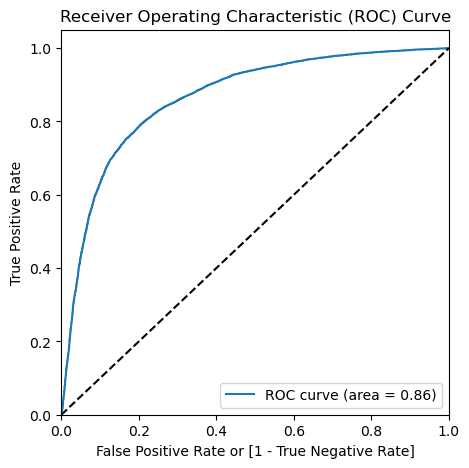

In [296]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate=False)
plot_roc_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

Optimal cutoff point

In [297]:
# Create columns with different probability cutoffs
cutoffs = [float(x) / 10 for x in range(10)]
for i in cutoffs:
    y_train_pred_final[i] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.464153,0,1,1,1,1,1,0,0,0,0,0
1,1,0.816064,1,1,1,1,1,1,1,1,1,1,0
2,1,0.909464,1,1,1,1,1,1,1,1,1,1,1
3,0,0.144456,0,1,1,0,0,0,0,0,0,0,0
4,0,0.839393,1,1,1,1,1,1,1,1,1,1,0


In [298]:
# Calculate accuracy, sensitivity, and specificity for various probability cutoffs
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensitivity', 'specificity'])
num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for i in num:
    confusion_matrix_i = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i])
    total_i = sum(sum(confusion_matrix_i))
    accuracy_i = (confusion_matrix_i[0, 0] + confusion_matrix_i[1, 1]) / total_i
    specificity_i = confusion_matrix_i[0, 0] / (confusion_matrix_i[0, 0] + confusion_matrix_i[0, 1])
    sensitivity_i = confusion_matrix_i[1, 1] / (confusion_matrix_i[1, 0] + confusion_matrix_i[1, 1])
    cutoff_df.loc[i] = [i, accuracy_i, sensitivity_i, specificity_i]

print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.500693     1.000000     0.000000
0.1   0.1  0.628530     0.979982     0.276101
0.2   0.2  0.695051     0.954215     0.435168
0.3   0.3  0.743621     0.923744     0.562998
0.4   0.4  0.771334     0.873517     0.668868
0.5   0.5  0.790804     0.820781     0.760744
0.6   0.6  0.790778     0.738933     0.842767
0.7   0.7  0.760971     0.616422     0.905922
0.8   0.8  0.679926     0.406470     0.954140
0.9   0.9  0.557402     0.129305     0.986688


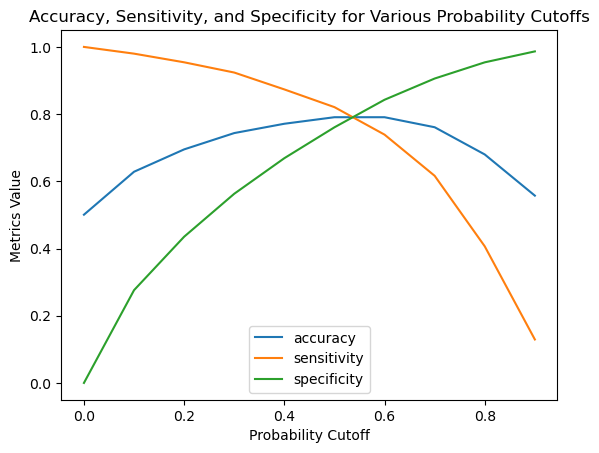

In [299]:
# Plot accuracy, sensitivity, and specificity for various probabilities
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensitivity', 'specificity'])
plt.xlabel('Probability Cutoff')
plt.ylabel('Metrics Value')
plt.title('Accuracy, Sensitivity, and Specificity for Various Probability Cutoffs')
plt.show()

# The optimal probability cutoff for our model is around 0.5

In [300]:
optimal_cutoff = 0.5

In [301]:
# Prepare test data and predict
X_test = X_test[rfe_col]
X_test_sm = sm.add_constant(X_test)
y_test_pred = result_summary_5.predict(X_test_sm)
y_test_pred_final = pd.DataFrame({'Churn': y_test.values, 'Churn_Prob': y_test_pred})
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > optimal_cutoff else 0)
y_test_pred_final.head()

,Churn,Churn_Prob,predicted
38017,1,0.850309,1
7994,0,0.306187,0
51540,1,0.827707,1
26903,0,0.645908,1
15570,0,0.406070,0


In [302]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted)
print(confusion)

[[6253 1962]
 [1466 6696]]


In [303]:
# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted)}')

Accuracy : 0.7906820541002626


In [304]:
# Top 10 predictors
abs(result_summary_5.params).sort_values(ascending=False)[0:10]

loc_ic_mou_8            2.105451
const                   1.332798
gd_ph_loc_ic_mou        1.071741
monthly_3g_8            0.870757
total_rech_num_8        0.851945
monthly_2g_8            0.676246
gd_ph_total_rech_num    0.589957
last_day_rch_amt_8      0.554271
std_ic_t2t_mou_8        0.446238
sachet_2g_8             0.432197
dtype: float64

Insight: 
 Logistic Regression Results- The logistic regression model achieves an accuracy of 78.08% on the train data and 79.06% on the test data.
 Interpretation of Features- The analysis reveals that the most critical features contributing to churn prediction come from the action phase, aligning with business understanding.


## Decision Tree

In [305]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca_transformed, y_resampled, train_size=0.7, random_state=25)

In [306]:
from sklearn.tree import DecisionTreeClassifier
# Initial Decision Tree Classifier
initial_dt = DecisionTreeClassifier(random_state=42, max_depth=10)
initial_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [307]:
# Train Accuracy
y_train_pred = initial_dt.predict(X_train)
print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

Train accuracy : 0.878889383194201


In [308]:
# Predict on test data
y_test_pred = initial_dt.predict(X_test)

In [309]:
# Print the classification report on test data
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      8215
           1       0.81      0.89      0.85      8162

    accuracy                           0.84     16377
   macro avg       0.85      0.84      0.84     16377
weighted avg       0.85      0.84      0.84     16377



### Hyperparameter Tuning

In [310]:
from sklearn.model_selection import GridSearchCV
# Grid Search for Hyperparameter Tuning
dt = DecisionTreeClassifier(random_state=42)

# Define parameters
params = {
    "max_depth": [2, 3, 5, 10, 20, 30, 40, 50, 100],
    "min_samples_leaf": [5, 10, 20, 50, 100, 250, 500, 800, 1000],
    "min_samples_leaf": [1, 5, 10, 25, 50, 100]
}
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1,
                           verbose=1,
                           scoring="accuracy")

# Perform grid search
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 54 candidates, totalling 216 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30, 40, 50, 100],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [311]:
# Best score
best_score = grid_search.best_score_

In [312]:
# Best estimator
dt_best = grid_search.best_estimator_

In [313]:
# Predict on training and test data
y_train_pred = dt_best.predict(X_train)
y_test_pred = dt_best.predict(X_test)

In [314]:
# Print the classification report on test data
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.90      8215
           1       0.88      0.93      0.90      8162

    accuracy                           0.90     16377
   macro avg       0.90      0.90      0.90     16377
weighted avg       0.90      0.90      0.90     16377



Insight: We are getting an accuracy of 90%

## RANDOM FOREST

In [315]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=15, max_depth=10, max_features=5, random_state=25, oob_score=True)
rf.fit(X_train, y_train)

# Train Accuracy
y_train_pred = rf.predict(X_train)
print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

# Predict on test data
y_test_pred = rf.predict(X_test)

# Print the classification report on test data
print(metrics.classification_report(y_test, y_test_pred))
print(f'Test accuracy : {metrics.accuracy_score(y_test, y_test_pred)}')

C:\Users\navneet.singh\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Train accuracy : 0.9148980713369795
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      8215
           1       0.87      0.92      0.89      8162

    accuracy                           0.89     16377
   macro avg       0.89      0.89      0.89     16377
weighted avg       0.89      0.89      0.89     16377

Test accuracy : 0.8914941686511572


# Conclusion: 
Considering our business problem of customer retention, prioritizing higher recall is crucial. Identifying potential churners accurately is more cost-effective than losing a customer and acquiring new ones.

Upon comparing the trained models, it is evident that the tuned Random Forrest  perform exceptionally well, achieving accuracy of 91 & 89 on Train & Test data respectively. In this context, we choose the Random Forrest model due to its simplicity and comparable performance.

# Strategies to Manage Customer Churn

The top 10 predictors are as follows:


1. loc_ic_mou_8
2. const
3. gd_ph_loc_ic_mou 
4. monthly_3g_8
5. total_rech_num_8
6. monthly_2g_8
7. gd_ph_total_rech_num
8. last_day_rch_amt_8
9. std_ic_t2t_mou_8
10. sachet_2g_8

It's noticeable that the majority of these predictors are from the action phase, indicating a significant drop in engagement during that period.

Further insights from EDA suggest additional strategies:

1. Users with a maximum recharge amount less than 200, even in the good phase, should be tagged and re-evaluated periodically as they are more likely to churn.

2. Users with less than 4 years of association with the network should be monitored regularly, as data shows that users with less than 4 years of association tend to churn more.

3. While MOU is a major factor, special attention should be given to VBC data, especially if the user is not using a data pack.

# Business Insights
- The telecom company should prioritize roaming rates and consider offering attractive deals to customers using services from roaming zones.

- There is a need for a closer look at STD and ISD rates. If these rates are relatively high, providing special STD and ISD packages might help in retaining customers.

- Pay attention to users with incoming calls from fixed lines deviating 1.27 standard deviations below the average. This group is at a higher risk of churning, and strategies to engage and retain these users should be explored.
